In [1]:
import xarray as xr
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from pathlib import Path

def quick_load_var(loc, var, table, model, experiment, member):
    fils = sorted(
        list(Path(loc).glob("_".join([var, table, model, experiment, member, "*.nc"])))
    )
    if len(fils) == 0:
        raise IOError("Can not find the files.")
    elif len(fils) == 1:
        ds = xr.open_dataset(fils[0])
    else:
        ds = xr.open_mfdataset(fils, combine="by_coords")
    return ds[var].compute()

In [2]:
data_loc = Path("/Volumes/Glyph6TB/CMIP6")

In [4]:
models = {"CESM2": ('aqua-control', 'aqua-control-lwoff', 'amip', 'amip-lwoff'),
         'CNRM-CM6-1': ('aqua-control', 'aqua-control-lwoff', 'amip', 'amip-lwoff'),
         'IPSL-CM6A-LR': ('aqua-control', 'aqua-control-lwoff', 'amip', 'amip-lwoff'), 
         'MRI-ESM2-0': ('amip', 'amip-lwoff')}


use_member = {}
for m in models:
    if m == 'CNRM-CM6-1':
        use_member[m] = 'r1i1p1f2'
    else:
        use_member[m] = 'r1i1p1f1'



In [6]:
prw = {}
for m in models:
    prw[m] = {}
    for s in models[m]:
        tmp = quick_load_var(data_loc, 'prw', 'Amon', m, s, use_member[m])
        prw[m][s] = tmp.mean(dim=('time','lon'))


/Users/brianpm/miniconda3/envs/py38/lib/python3.8/site-packages/xarray/conventions.py:490: SerializationWarning: variable 'prw' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


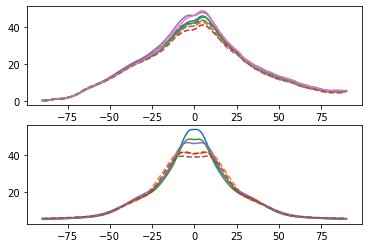

In [9]:
fig, ax = plt.subplots(nrows=2)
for m in prw:
    for s in prw[m]:
        if 'aqua' in s:
            panel = 1
        else:
            panel = 0
        if 'off' in s:
            lin = 'dashed'
        else:
            lin = 'solid'
            
        ax[panel].plot(prw[m][s]['lat'], prw[m][s], linestyle=lin)